CHIBUIKE OKOROAMA C0892150_AML3104_assignment#1
ALGERIAN FIRE DATA AML3104 **bold text**

In [66]:
# load important python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**DATA DESCRIPTION**

Date: (DD/MM/YYYY) Day, month ('June' to 'September'), year (2012) Weather data observations

Temp: temperature noon (temperature max) in Celsius degrees: 22 to 42

RH: Relative Humidity in %: 21 to 90

Ws: Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

FIRE WEATHER INDEX (FWI) Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI System: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely fire and not fire

**LOAD DATASET INTO COLAB**

In [67]:
# Load the dataset
file_path = '/content/Algerian_forest_fires_cleaned.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


**DATA CLEANING AND PREPROCESSING**

In [68]:
# display data information
data.info() # dataset feature dtypes are good, therefore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [69]:
# check for missing values
data_missing = data.isnull().sum()
data_type = data.dtypes


# check data types
data_missing, data_type # dataset datatype are in good shape


(day            0
 month          0
 year           0
 Temperature    0
 RH             0
 Ws             0
 Rain           0
 FFMC           0
 DMC            0
 DC             0
 ISI            0
 BUI            0
 FWI            0
 Classes        0
 Region         0
 dtype: int64,
 day              int64
 month            int64
 year             int64
 Temperature      int64
 RH               int64
 Ws               int64
 Rain           float64
 FFMC           float64
 DMC            float64
 DC             float64
 ISI            float64
 BUI            float64
 FWI            float64
 Classes         object
 Region           int64
 dtype: object)

In [70]:

# if there was null values, we use the code below to display if there are missing values.
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [71]:
# describe the data
data.describe()




,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [72]:
# Classes clomun with different records
data[['Classes']].value_counts()

Classes      
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [73]:
# change the fire to 1 and not fire to 0. Important for visualization
data['Classes']=np.where(data['Classes'].str.contains('not fire'),0,1)
data[['Classes']].value_counts()

Classes
1          137
0          106
Name: count, dtype: int64

In [74]:
data.head(5) # display top 5

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


**DATA VISUALIZATION (EDA)**

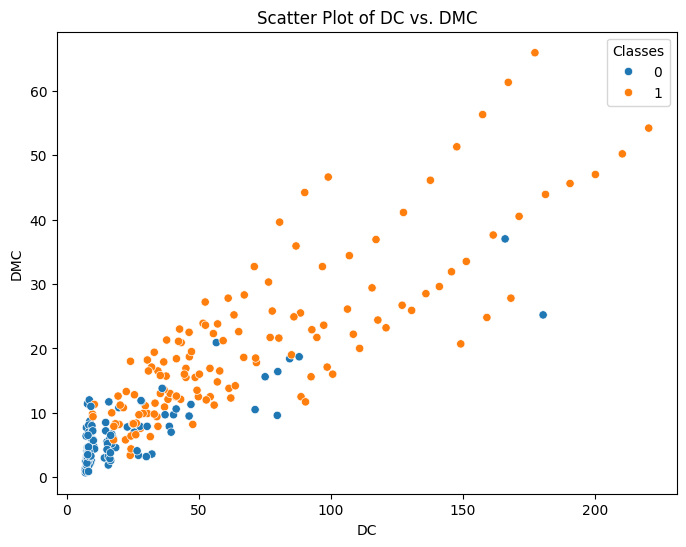

In [10]:
# Scatter plot of DC vs. DMC
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DC', y='DMC', hue='Classes', data=data)
plt.xlabel('DC')
plt.ylabel('DMC')
plt.title('Scatter Plot of DC vs. DMC')
plt.show()

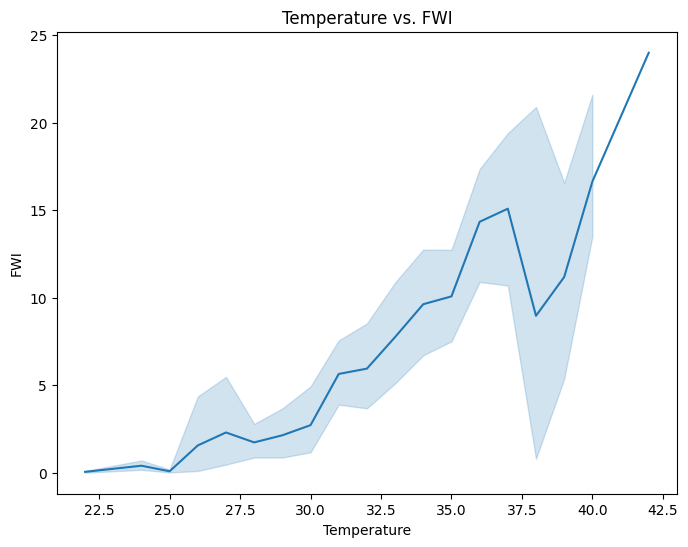

In [11]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Temperature', y='FWI', data=data)
xlabel= 'Temperature'
ylabel= 'FWI'
plt.title('Temperature vs. FWI')

plt.show()

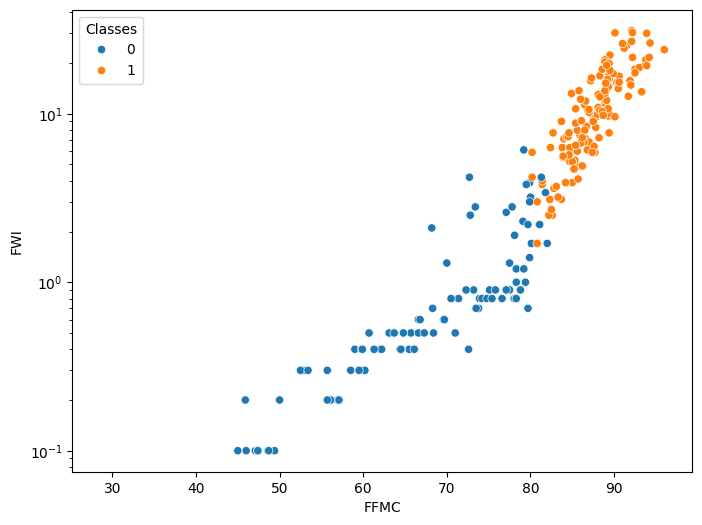

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='FFMC', y='FWI', hue='Classes', data=data)
plt.yscale('log')
xlabel= 'year'
ylabel= 'Rain'
plt.title= ('month vs Rain')

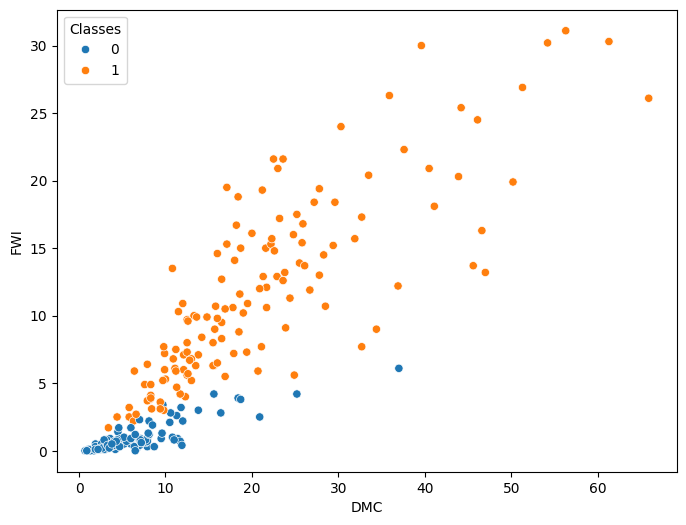

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'DMC', y= 'FWI', hue='Classes', data=data)
plt.xlabel=('DMC')
plt.ylabel=('FWI')
plt.title=( 'plot DMC vs BUI')

plt.show()

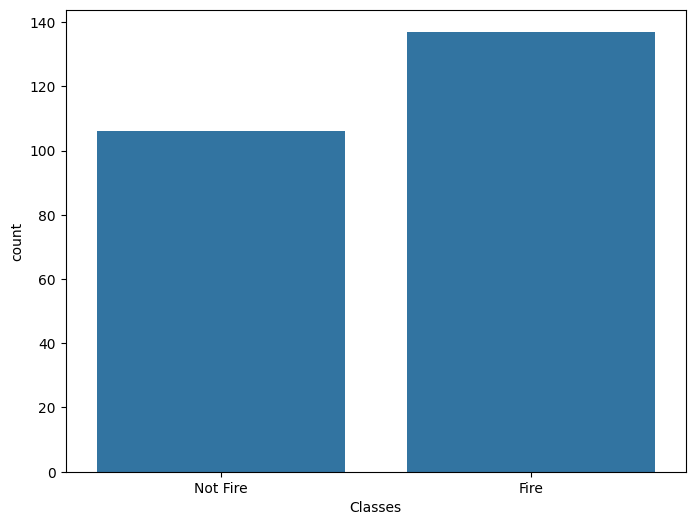

In [14]:
# showing fire and not fire distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Classes', data=data)
plt.xlabel=('Class')
plt.ylabel=('Count')
plt.title=('Distribution of Classes')
plt.xticks(ticks=[0, 1], labels=['Not Fire', 'Fire'])
plt.show()

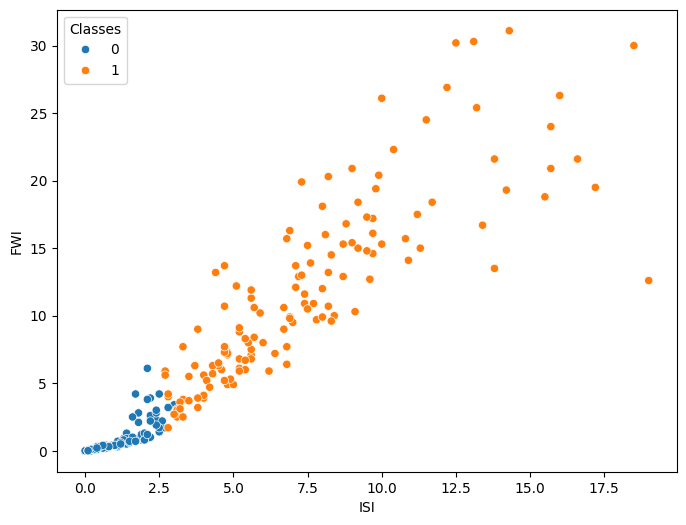

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'ISI', y= 'FWI', hue='Classes', data=data)
plt.xlabel=('ISI')
plt.ylabel=('FWI')
plt.show()

<Axes: >

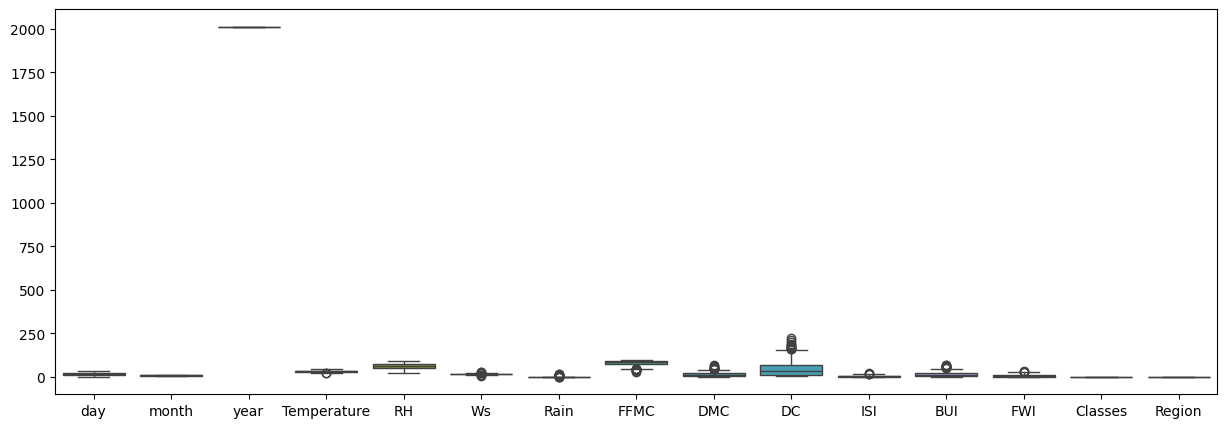

In [16]:
# checking for outliers
plt.figure(figsize=(15,5)) # data looks good without outliers
sns.boxplot(data=data)

**MODEL BUILDING**

In [75]:


# Import important libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.metrics import accuracy_score, classification_report  # Import necessary metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
from sklearn.tree import DecisionTreeRegressor


In [76]:
# Separate features and target
X = data.drop(['FWI', 'year', 'Classes', 'Region'], axis=1)
y = data['FWI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
115,24,9,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8
207,26,8,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0
158,7,7,38,43,13,0.5,85.0,13.0,35.4,4.1,13.7
132,11,6,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0
84,24,8,34,64,14,0.0,88.9,40.5,171.3,9.0,50.9


In [77]:
# check for x train and test shape
X_train.shape, X_test.shape

((194, 11), (49, 11))

<Axes: >

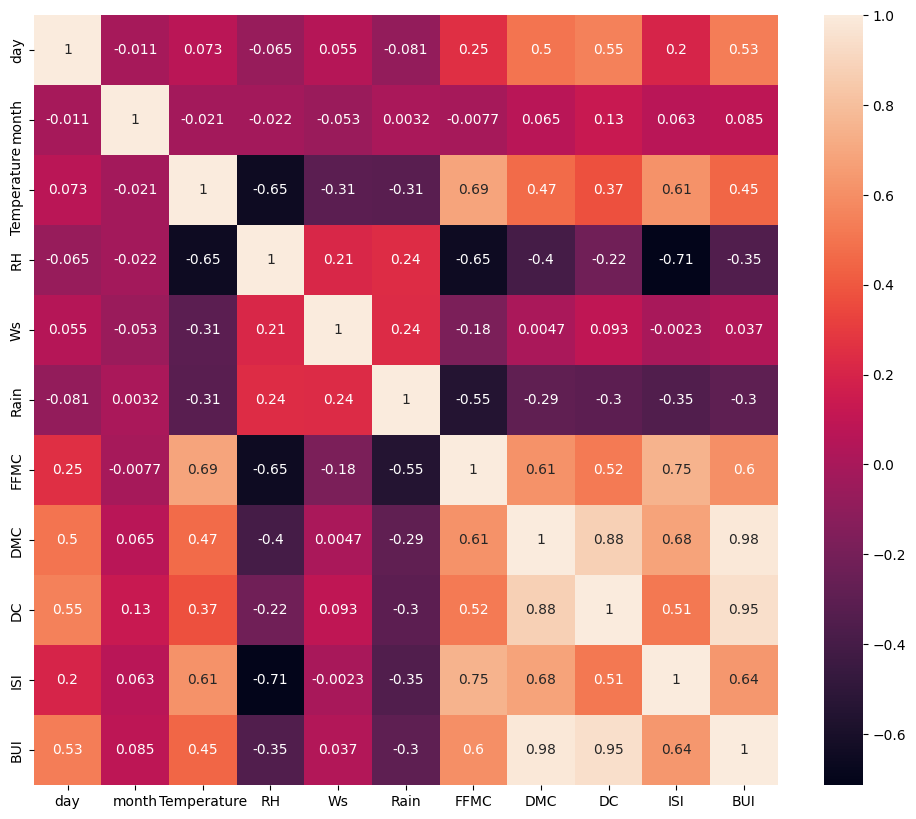

In [78]:

# Visualize correlation Heatmap
from re import X
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True)

In [79]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# eliminate feratures with multicolineearity
# threshold domain
def correlation(dataset, threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range (i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [81]:
corr_features=correlation(X_train, 0.85)# set muliticolinearity threshold, now best score is 0.85

MODELING USING DIFFERENT TECHNIQUES

In [82]:
# Implementation of Multiple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions and evaluation for linear regression
y_pred_lin = lin_reg.predict(X_test_scaled)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
print(f'Linear Regression MSE: {mse_lin}, R2: {r2_lin}, MAE: {mae_lin}')


Linear Regression MSE: 0.3599934326559309, R2: 0.9881223298691986, MAE: 0.4383151160589087


In [83]:
# Implementation of Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predictions and evaluation for polynomial regression
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print(f'Polynomial Regression MSE: {mse_poly}, R2: {r2_poly}, MAE: {mae_poly}')




Polynomial Regression MSE: 0.22755500505074222, R2: 0.9924920205719729, MAE: 0.3028069309610609


In [84]:
# Implementation of Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_scaled, y_train)

# Predictions and evaluation for decision tree regression
y_pred_tree = tree_reg.predict(X_test_scaled)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f'Decision Tree Regression MSE: {mse_tree}, R2: {r2_tree}, MAE: {mae_tree}')

Decision Tree Regression MSE: 1.9063265306122443, R2: 0.9371024145491883, MAE: 0.7734693877551022


Apply Regularization and Hyprparameter techniques




In [85]:
# Application of Regularization Techniques (Lasso, Ridge)
ridge = Ridge()
lasso = Lasso()



In [86]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)
print(f'Best parameters for Ridge: {ridge_cv.best_params_}')
print(f'Best CV MSE for Ridge: {-ridge_cv.best_score_}')

lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train)
print(f'Best parameters for Lasso: {lasso_cv.best_params_}')
print(f'Best CV MSE for Lasso: {-lasso_cv.best_score_}')


Best parameters for Ridge: {'alpha': 1}
Best CV MSE for Ridge: 2.285643104676593
Best parameters for Lasso: {'alpha': 0.1}
Best CV MSE for Lasso: 2.29934061442045


In [87]:
# Predictions and evaluation for ridge and lasso regression
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_best.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_best.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge}, R2: {r2_ridge}, MAE: {mae_ridge}')

lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha'])
lasso_best.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_best.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}, R2: {r2_lasso}, MAE: {mae_lasso}')


Ridge Regression MSE: 0.5714101325370444, R2: 0.9811468197805726, MAE: 0.49144027929915
Lasso Regression MSE: 0.5376370911508351, R2: 0.9822611318999348, MAE: 0.5480885803043221


COMPARE MODEL RESULTS

In [88]:
# Model performance evaluation
models = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regression']
mses = [mse_lin, mse_poly, mse_ridge, mse_lasso, mse_tree]
r2s = [r2_lin, r2_poly, r2_ridge, r2_lasso, r2_tree]
maes = [mae_lin, mae_poly, mae_ridge, mae_lasso, mae_tree]

evaluation = pd.DataFrame({'Model': models, 'MSE': mses, 'R2': r2s, 'MAE': maes})
print(evaluation)


                      Model       MSE        R2       MAE
0         Linear Regression  0.359993  0.988122  0.438315
1     Polynomial Regression  0.227555  0.992492  0.302807
2          Ridge Regression  0.571410  0.981147  0.491440
3          Lasso Regression  0.537637  0.982261  0.548089
4  Decision Tree Regression  1.906327  0.937102  0.773469


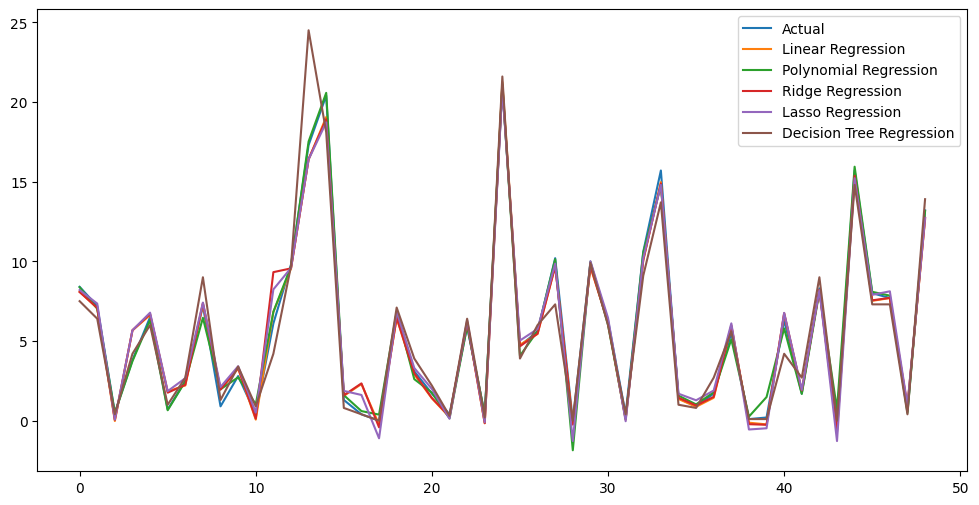

In [90]:
# Plot of model vs actual data

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lin, label='Linear Regression')
plt.plot(y_pred_poly, label='Polynomial Regression')
plt.plot(y_pred_ridge, label='Ridge Regression')
plt.plot(y_pred_lasso, label='Lasso Regression')
plt.plot(y_pred_tree, label='Decision Tree Regression')
plt.legend()
plt.title=('Model Predictions vs Actual')
plt.xlabel=('Data Point')
plt.ylabel=('FWI')
plt.show()

PICKLE THE MODELS

In [31]:
# Save the linear regression model to disk
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lin_reg, file)

# Save the polynomial regression model to disk
with open('polynomial_regression_model.pkl', 'wb') as file:
    pickle.dump(poly_reg, file)

# Save the ridge regression model to disk
with open('ridge_regression_model.pkl', 'wb') as file:
    pickle.dump(ridge_best, file)

# Save the lasso regression model to disk
with open('lasso_regression_model.pkl', 'wb') as file:
    pickle.dump(lasso_best, file)

print("All models have been pickled and saved to disk.")

All models have been pickled and saved to disk.


**CONCLIUSION**: The model showed that there were over 90% of R2 sqaured for all models with different low mean errors. However Polynomial model showed that independent variables were 99.2% able to expain the target variable (FWI) with the lowest error of 23% between predicted and actual values. Linear Regression was close with 98.8%~ 99% but more errors than Polynomial.

Note: the Decision Tree classifier had the least accuracy and we can see that its errors are higher.

With plot above we can see that how close polynomial model was able to predict the values of actual with least errors.